In [1]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
matrix_data = pan.read_csv("sonar.all-data.csv")

In [4]:
features = matrix_data.drop("Label", axis = 1)
label = matrix_data["Label"]

<Axes: >

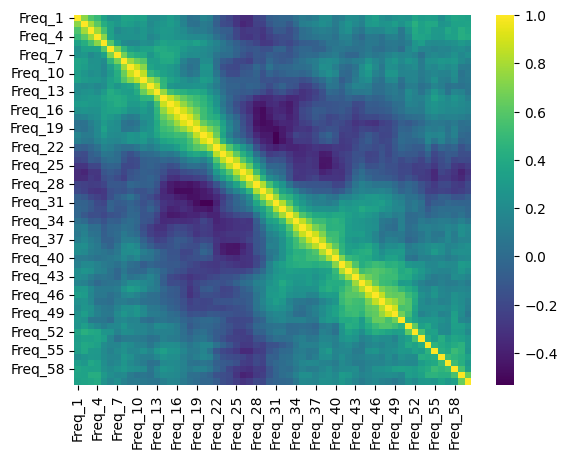

In [23]:
#viz
test = pan.DataFrame(matrix_data)
test["Label"] = test["Label"].map({"R": 0, "M": 1})
sns.heatmap(matrix_data.corr(numeric_only = True), cmap = "viridis")

In [35]:
test.corr(numeric_only=True)["Label"].abs().sort_values(ascending = False)[: 6]

Label      1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Label, dtype: float64

In [36]:
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size = 0.1, random_state = 42)
scaler = StandardScaler()
knn_learner = KNeighborsClassifier()
order_of_operations = [("scale", scaler), ("knn", knn_learner)]
param_grid = {"knn__n_neighbors": list(range(1, 30))}
pipe = Pipeline(order_of_operations)
gridder = GridSearchCV(pipe, param_grid, scoring = "accuracy", cv = 7, verbose = 1)

In [37]:
gridder.fit(feature_train, label_train)

Fitting 7 folds for each of 29 candidates, totalling 203 fits


GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy', verbose=1)

In [38]:
gridder.best_estimator_.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [39]:
predictions = gridder.predict(feature_test)

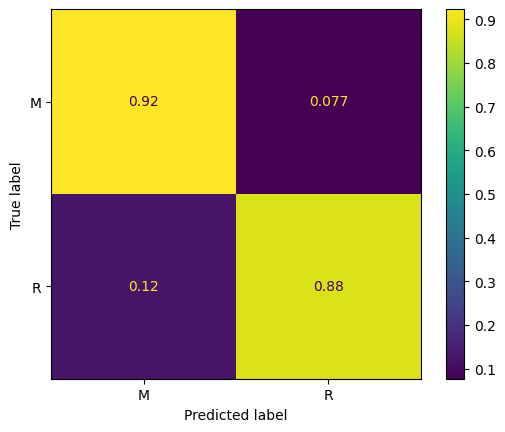

In [40]:
ConfusionMatrixDisplay.from_predictions(label_test, predictions, normalize = "true")

In [41]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



Text(0.5, 0, 'K Neighbours')

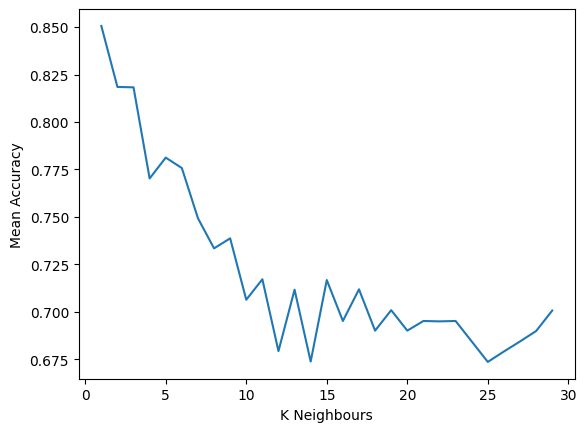

In [64]:
sns.lineplot(x = gridder.cv_results_.get("param_knn__n_neighbors"), y = gridder.cv_results_.get("mean_test_score"))
plotter.ylabel("Mean Accuracy")
plotter.xlabel("K Neighbours")

In [54]:
gridder.cv_results_

{'mean_fit_time': array([0.00426752, 0.00341552, 0.00355731, 0.0032743 , 0.00298776,
        0.00370356, 0.00370506, 0.00370114, 0.00498271, 0.00371122,
        0.0037009 , 0.0038461 , 0.00398956, 0.00412478, 0.00413636,
        0.003699  , 0.00427927, 0.00356054, 0.00355707, 0.00357035,
        0.00398854, 0.00369525, 0.00356548, 0.00371865, 0.00370778,
        0.00384756, 0.00370945, 0.00413152, 0.00369457]),
 'std_fit_time': array([1.97940118e-03, 7.19354677e-04, 4.95716185e-04, 6.99373442e-04,
        2.88557849e-05, 8.64840284e-04, 1.13899132e-03, 1.02791772e-03,
        1.67436403e-03, 6.84348697e-04, 1.02688907e-03, 8.17166531e-04,
        7.49017704e-04, 8.13905357e-04, 1.34757872e-03, 1.15180143e-03,
        1.74311983e-03, 8.92052837e-04, 7.19287509e-04, 7.16123570e-04,
        1.18778132e-03, 8.75734378e-04, 7.28527861e-04, 8.72023585e-04,
        8.79032177e-04, 8.22608527e-04, 1.15303184e-03, 1.34621847e-03,
        1.01754404e-03]),
 'mean_score_time': array([0.06131588, 